In [4]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from utils.dataManagers.dataSteward import DataSteward
from utils.dataManagers.informations import informer
from utils.predictions import *
from utils.dataManagers.dataWrangler import *

ds = DataSteward('mapper_and_most_frequent', 'mean')
column_desc = informer.get_column_descriptions()

train = ds.train_data
test = ds.test_data
ytrain = ds.train_response

In [5]:
from scipy.stats import skew

number_type = get_number_types(train)
categorical = get_categoricals(train)

skewness = number_type.apply(lambda x: skew(x))
cols_to_log = skewness[np.abs(skewness.sort_values()) >= .75].index

train_log = log_given_columns(train, cols_to_log)
test_log = log_given_columns(test, cols_to_log)
trainWithDummies, testWithDummies = get_df_for_predictions(train_log, test_log)

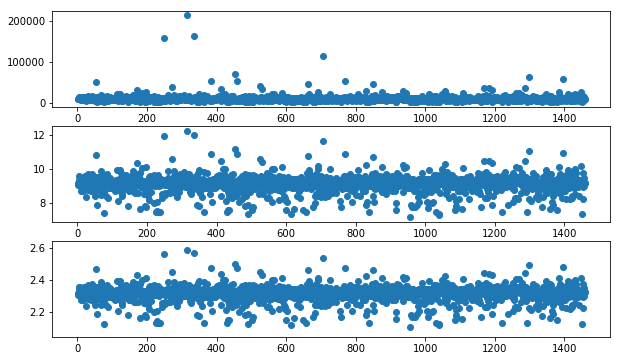

In [5]:
fig, ax = plt.subplots(nrows=3, figsize=[10, 6])
ax[0].scatter(train.index, train.LotArea)
ax[1].scatter(train.index, np.log1p(train.LotArea))
ax[2].scatter(train.index, np.log1p(np.log1p(train.LotArea)))

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


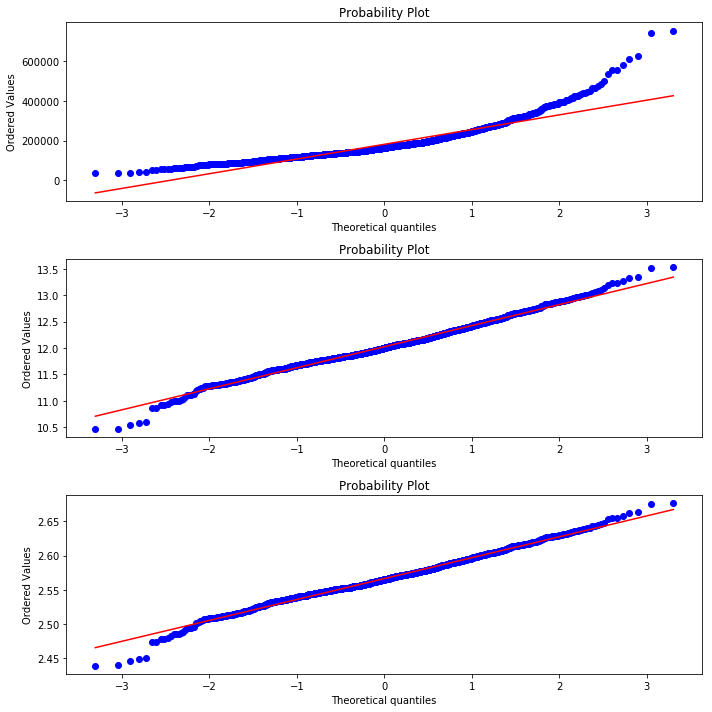

In [12]:
from scipy import stats
fig,ax = plt.subplots(nrows=3, figsize=[10,10], tight_layout=True)
_ = stats.probplot(ytrain, plot=ax[0])
_ = stats.probplot(np.log1p(ytrain), plot=ax[1])
_ = stats.probplot(np.log1p(np.log1p(ytrain)), plot=ax[2])

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

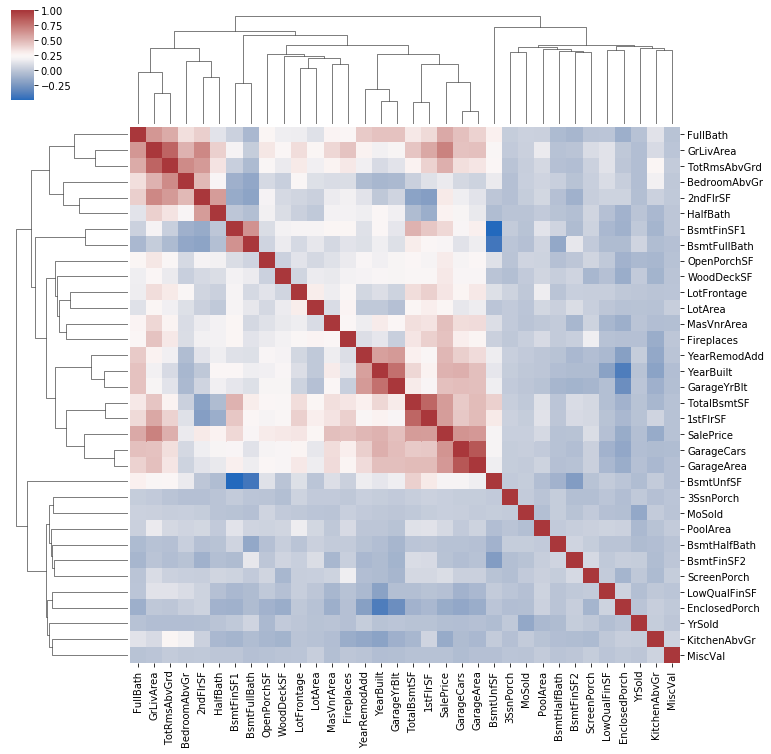

In [7]:
df = train.copy()
df['SalePrice'] = ytrain

sns.clustermap(df.corr(), cmap="vlag", figsize=[12,12])
df.corr()['SalePrice'].sort_values(ascending=False)

In [17]:
df = train.copy()
bins=7

df['SalePrice'] = ytrain
df['type'] = pd.cut(df.SalePrice, bins=bins)
pd.crosstab(df.OverallQual, df.type)
#  .plot(kind='bar', figsize=[10,6])

type            (34179.9, 137771.429]  (137771.429, 240642.857]  \
OverallQual                                                       
Above Average                      91                       274   
Average                           233                       164   
Below Average                     105                        10   
Excellent                           0                         1   
Fair                               19                         1   
Good                               10                       248   
Poor                                3                         0   
Very Excellent                      0                         2   
Very Good                           1                        51   
Very Poor                           2                         0   

type            (240642.857, 343514.286]  (343514.286, 446385.714]  \
OverallQual                                                          
Above Average                          9                         0   
Average                                0                         0   
Below Average                          1                         0   
Excellent                             20                        17   
Fair                                   0                         0   
Good                                  59                         2   
Poor                                   0                         0   
Very Excellent                         3                         5   
Very Good                             94                        21   
Very Poor                              0                         0   

type            (446385.714, 549257.143]  (549257.143, 652128.571]  \
OverallQual                                                          
Above Average                          0                         0   
Average                                0                         0   
Below Average                          0                         0   
Excellent                              2                         3   
Fair                                   0                         0   
Good                                   0                         0   
Poor                                   0                         0   
Very Excellent                         4                         2   
Very Good                              1                         0   
Very Poor                              0                         0   

type            (652128.571, 755000.0]  
OverallQual                             
Above Average                        0  
Average                              0  
Below Average                        0  
Excellent                            0  
Fair                                 0  
Good                                 0  
Poor                                 0  
Very Excellent                       2  
Very Good                            0  
Very Poor                            0

In [18]:
pd.crosstab(df.HeatingQC, df.CentralAir)

CentralAir       No  Yes
HeatingQC               
Average/Typical  49  379
Excellent         8  733
Fair             24   25
Good             13  228
Poor              1    0

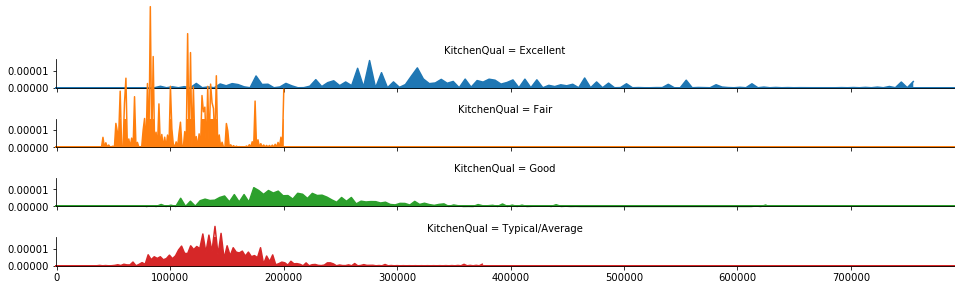

In [68]:
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="KitchenQual", hue="KitchenQual", aspect=15, size=.9)
g.map(sns.kdeplot, 'SalePrice', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, 'SalePrice', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


L1        L2              type
0  5.130037  2.413116  (12.217, 12.656]
1  4.558967 -0.104127  (11.778, 12.217]
2  4.882689  2.964531  (12.217, 12.656]
3  4.347160 -0.500464  (11.778, 12.217]
4  4.718355  5.016574  (12.217, 12.656]

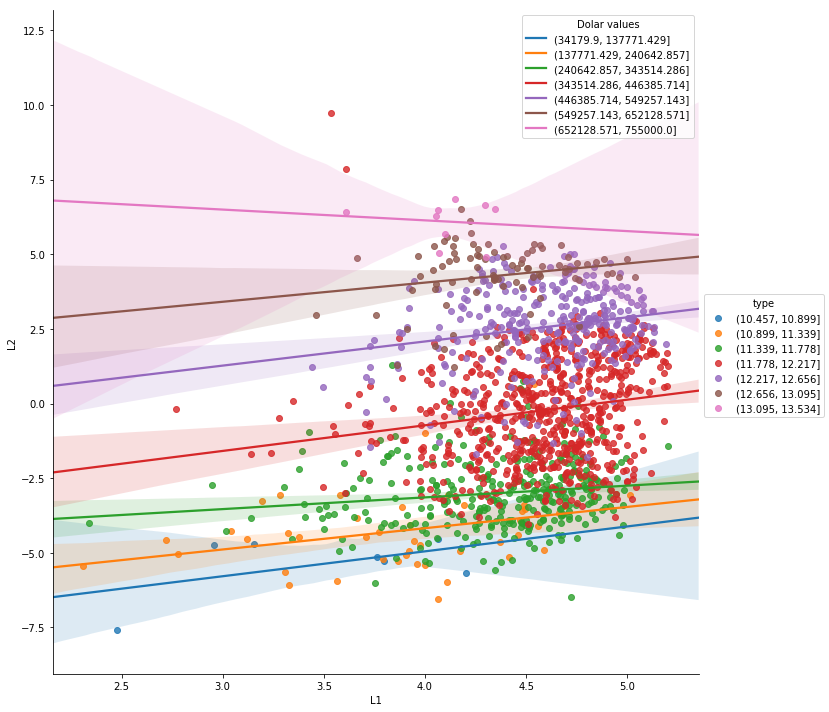

In [6]:
from sklearn.decomposition import TruncatedSVD
y = np.log1p(ytrain)
svd = TruncatedSVD()
bins = 7

svd_train = svd.fit_transform(trainWithDummies)
svd_train = pd.DataFrame(svd_train)
svd_train.columns = ['L1', 'L2']
svd_train['type'] = pd.cut(y.values, bins=bins)
svd_train.head()

sns.lmplot(data=svd_train, x='L1', y='L2', hue='type', size=10)

legend = list(pd.cut(ytrain, bins=bins).unique().sort_values(ascending=True))
plt.legend(legend, title='Dolar values')

In [3]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=3, n_jobs=-1)
iso.fit(trainWithDummies.values)
data_projected = iso.transform(trainWithDummies.values)
data_projected.shape

Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_jobs=-1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

(1460, 3)

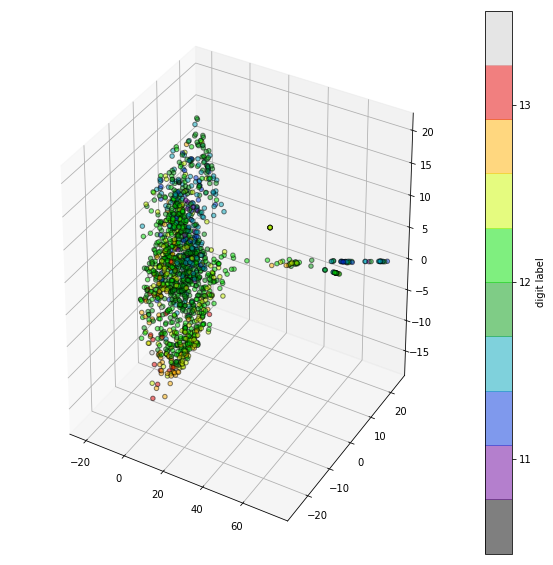

In [4]:
from mpl_toolkits.mplot3d import Axes3D

y = np.log1p(ytrain)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter3D(data_projected[:, 0], data_projected[:, 1], data_projected[:, 2],
            c=y.values, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

fig.colorbar(p, label='digit label', ticks=range(int(y.min()), int(y.max()) + 1),
            cmap=plt.cm.get_cmap('nipy_spectral', 10) )

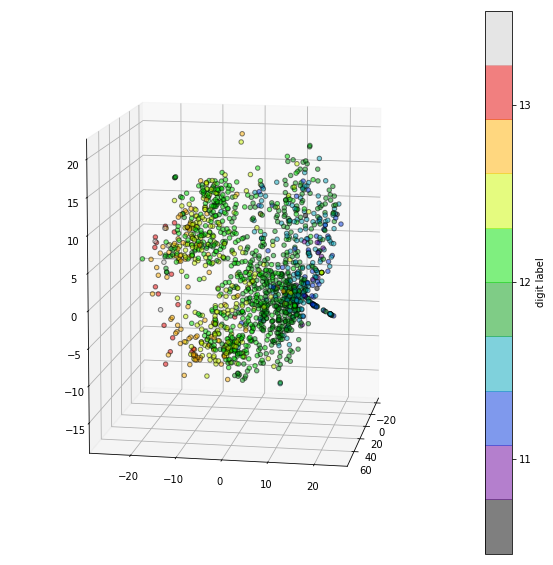

In [5]:
ax.view_init(10, 10)
fig

Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_jobs=-1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

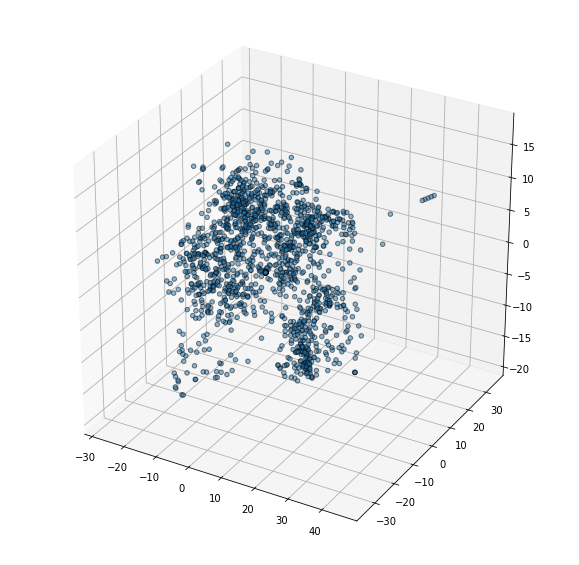

In [93]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=3, n_jobs=-1)
iso.fit(testWithDummies.values)
data_projected = iso.transform(testWithDummies.values)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter3D(data_projected[:, 0], data_projected[:, 1], data_projected[:, 2], edgecolor='none', alpha=0.5)

In [6]:
y = np.log1p(ytrain)

def init():
    fig = plt.figure()
    ax = Axes3D(fig)

    p = ax.scatter(data_projected[:, 0], data_projected[:, 1], data_projected[:, 2],
                c=y.values, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))

    fig.colorbar(p, label='digit label', ticks=range(int(y.min()), int(y.max()) + 1),
                cmap=plt.cm.get_cmap('nipy_spectral', 10) )
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

In [16]:
from matplotlib import animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

### Expand cell below to see magic!

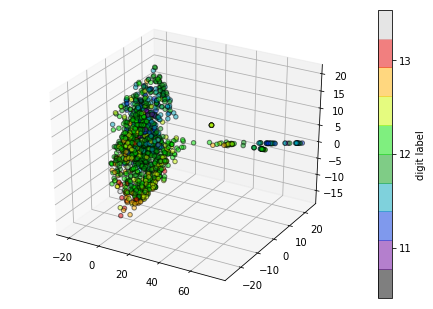

In [18]:
from IPython.display import HTML
HTML(anim.to_html5_video())

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


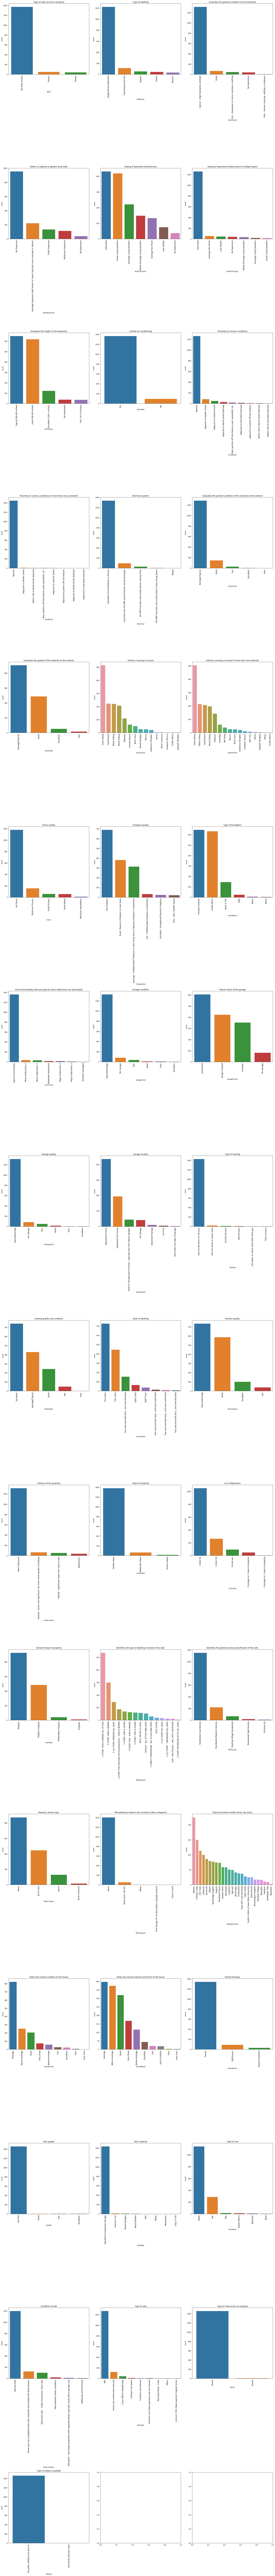

In [4]:
def format_xticks(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(12) 

def get_list_of_columns_ordered_by_value_counts(series):
    return list(series.value_counts().index)
        
def plot_categoricals(categorical, ncols = 2, figsize_ratio=[8, 14]):
    nrows = math.ceil(categorical.shape[1] / ncols)

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows,\
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows),\
                           tight_layout=True)

    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(categorical):
        axes = ax[i]
        sns.countplot(categorical[cat], ax=axes,\
                      order=get_list_of_columns_ordered_by_value_counts(categorical[cat]))
        format_xticks(axes)
        axes.set_title(column_desc[cat])
    
plot_categoricals(categorical, ncols=3)

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


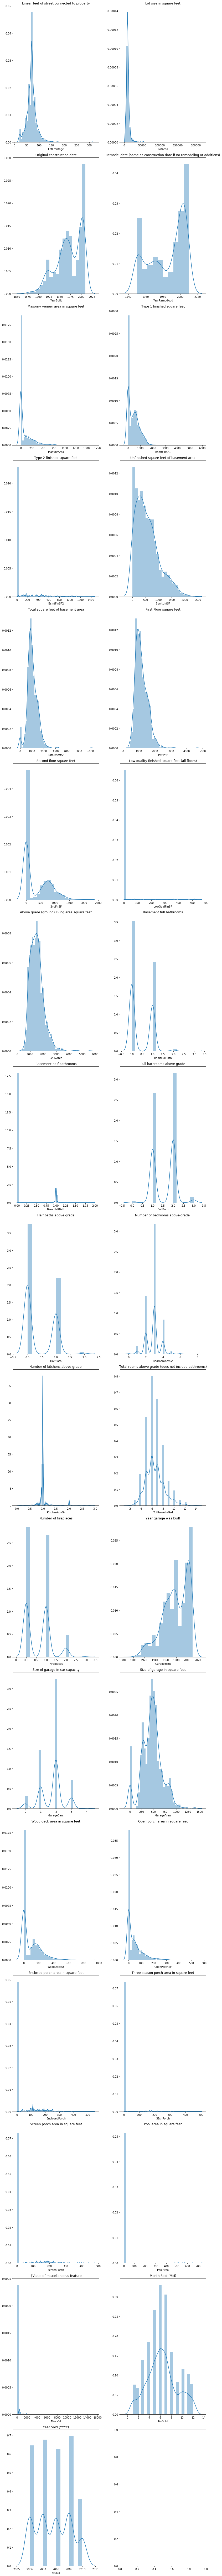

In [39]:
def plot_number_type_data(df, plot_function, ncols = 2, figsize_ratio=[6, 8]):
    nrows = math.ceil(df.shape[1] / ncols)
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, 
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows), tight_layout=True)
    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(df):
        axes = ax[i]
        plot_function(df[cat], ax=axes)
        axes.set_title(column_desc[cat])
    
plot_number_type_data(number_type, sns.distplot)

In [168]:
def plot_number_type_data(df, plot_function, options=[], figsize_ratio=[6, 8], y=None):
    ncols = len(options) + 1
    nrows = math.ceil(df.shape[1])
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows,
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows), tight_layout=True)
    #reshaping ax when only one plot in row is needed
    if len(options) == 0:
        ax = ax.reshape([-1,1])

    for i, cat in enumerate(df):
        col_num = 0
        series = df[cat]
        plot_with_y_presence_check(ax[i, 0], y, plot_function, series, color="#9b59b6")
        ax[i, col_num].set_title(column_desc[cat])

        if 'zero_vals_cut' in options:
            col_num += 1
            plot_with_y_presence_check(ax[i, 1], y, plot_function, series[series != 0], color="#3498db")
            ax[i, col_num].set_title(column_desc[cat] +' without zero values')
        if 'vals_log' in options:
            col_num += 1
            plot_with_y_presence_check(ax[i, 2], y, plot_function, np.log1p(series), color="#e74c3c")
            ax[i, col_num].set_title('Logarithm of ' + column_desc[cat] +' without zero values')
            ax[i, col_num].set_xlabel(f'np.log({cat})')

def plot_with_y_presence_check(ax, y, plot_function, series, color):
    if y is not None:
        if len(series.index) != len(y.index):
            y = y[series.index]
        plot_function(series, y, ax=ax, color=color)
    else:
        plot_function(series, ax=ax, color=color)

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


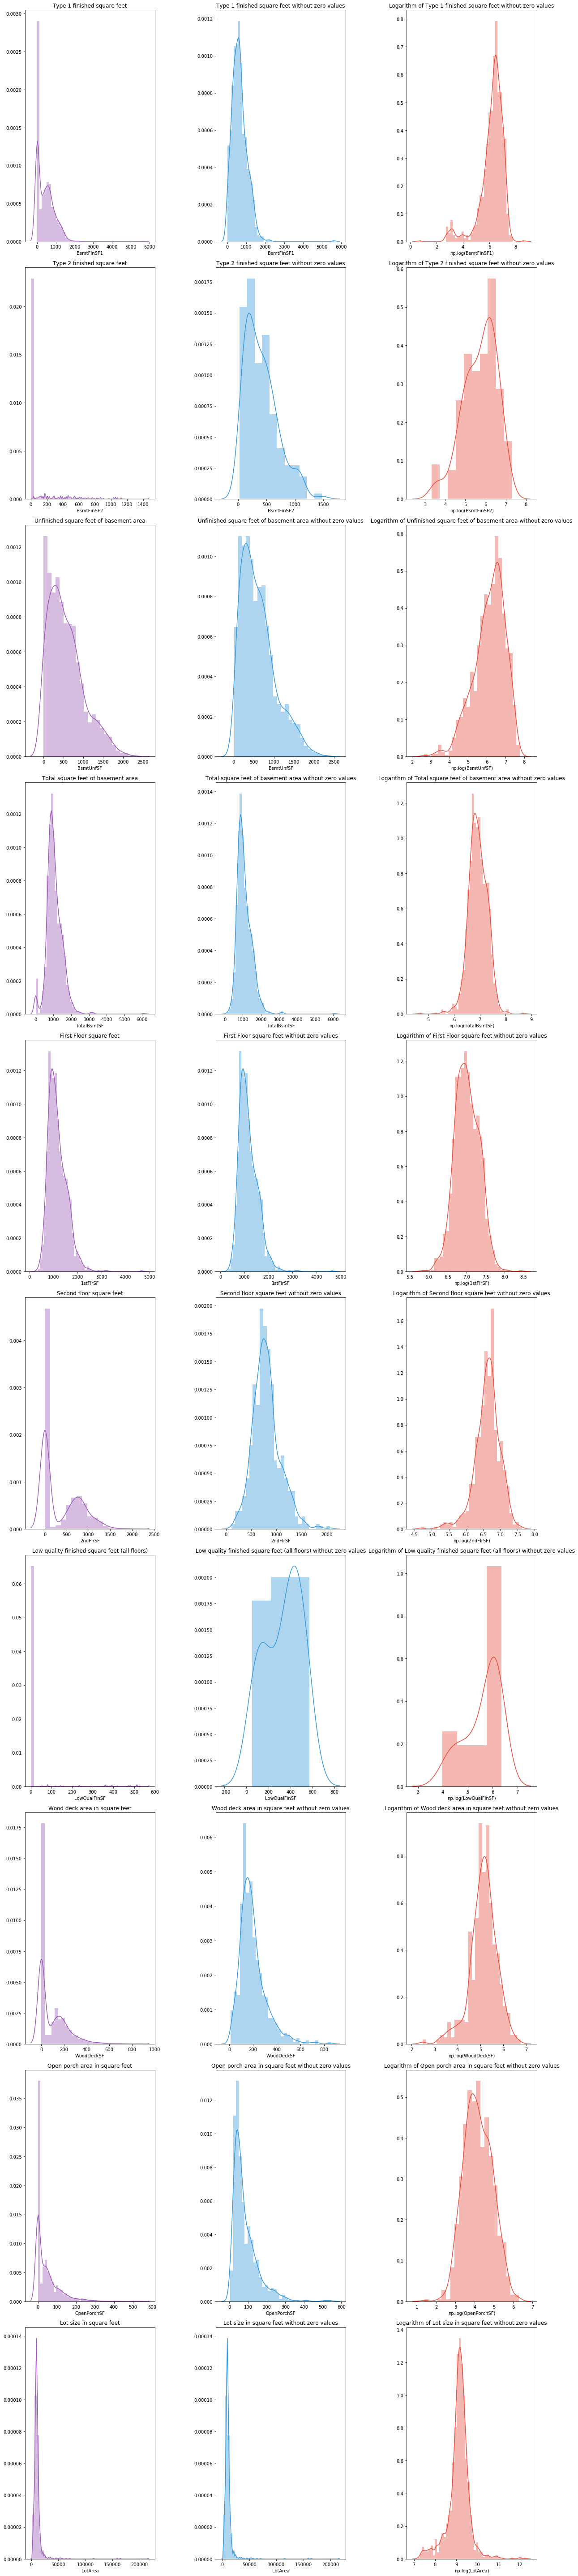

In [74]:
square_feet_columns = [s for s in list(number_type.columns) if 'sf' in s.lower()]
square_feet_columns.extend(['LotArea'])
df = train[square_feet_columns]

plot_number_type_data(df, sns.distplot, options=['zero_vals_cut', 'vals_log'])

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


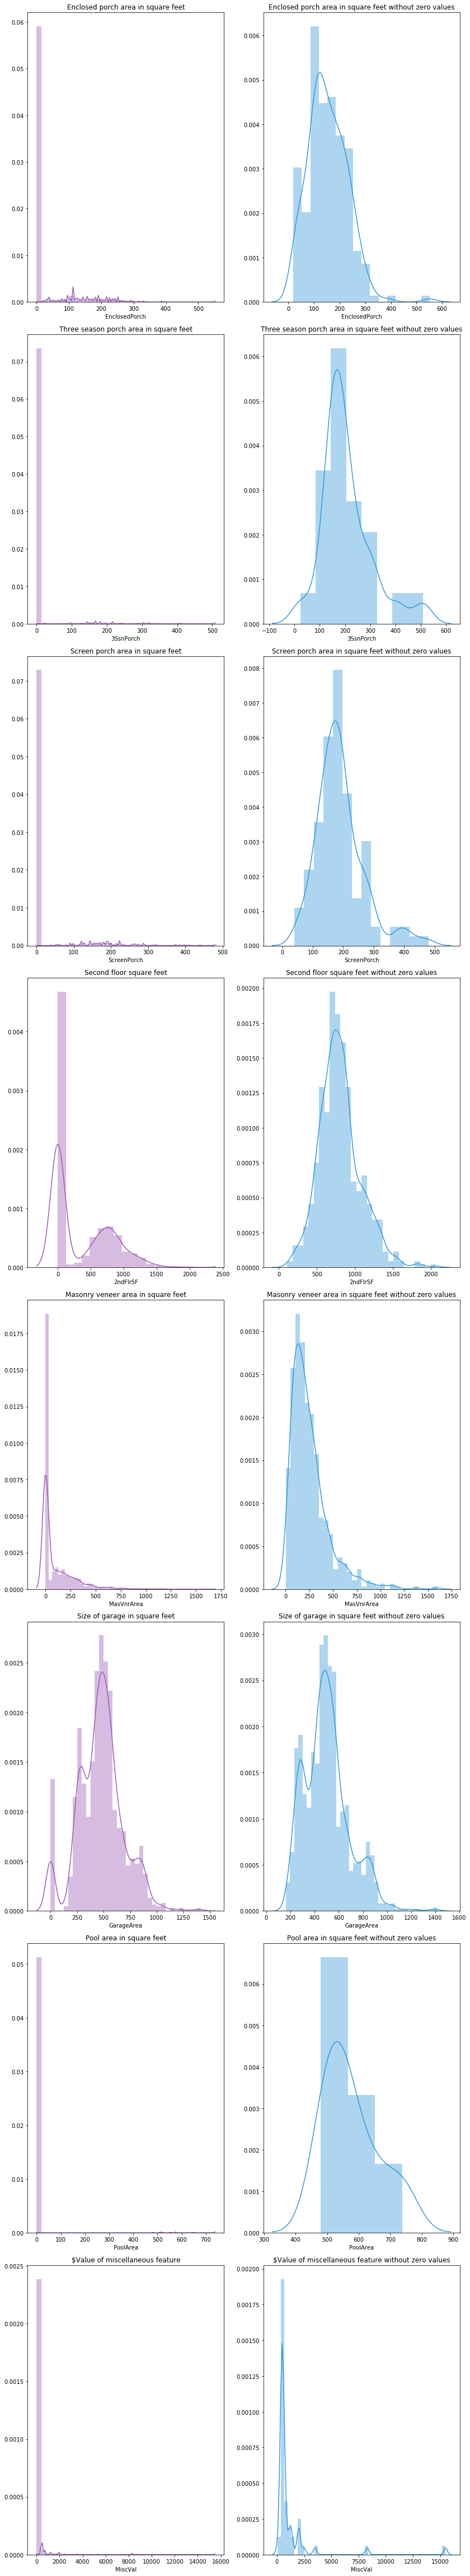

In [68]:
cols = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', '2ndFlrSF', 'MasVnrArea', 'GarageArea', 'PoolArea', 'MiscVal']
df = train[cols]

plot_number_type_data(df, sns.distplot, options=['zero_vals_cut'])

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


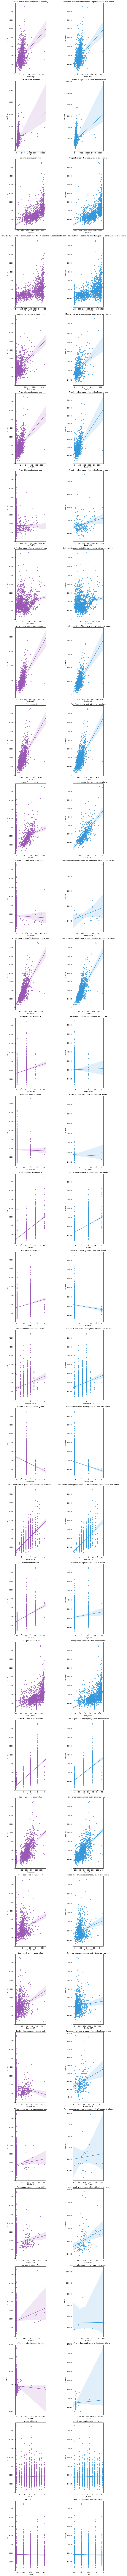

In [169]:
df = number_type.copy()
plot_number_type_data(df, sns.regplot, options=['zero_vals_cut'], y=ytrain)

In [171]:
df = train.copy()
df['SalePrice'] = ytrain
df['cstperSFofLotArea'] = df.SalePrice / train.LotArea
df['cstperSFofLivingSpace'] = df.SalePrice / (df.TotalBsmtSF + df.GrLivArea)
# neighborhood_mean_price = list(df.groupby('Neighborhood').SalePrice.mean().sort_values().index)
neighborhood_mean_price_perSFofLotArea = df.groupby(by='Neighborhood').cstperSFofLotArea.mean().sort_values(ascending=False).index
neighborhood_mean_price_persfofLivingSpace = df.groupby(by='Neighborhood').cstperSFofLivingSpace.mean().sort_values(ascending=False).index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

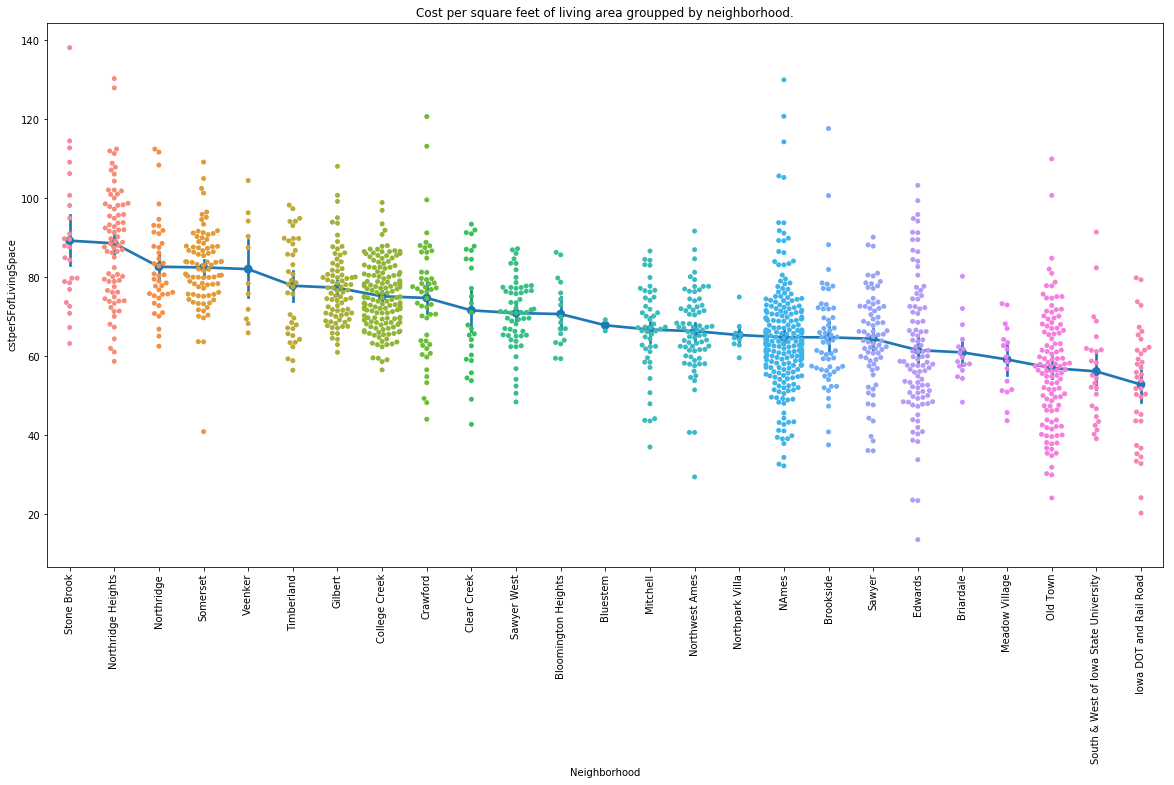

In [181]:
fig, ax = plt.subplots(figsize=[20,10])
sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace)
sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace)
plt.xticks(rotation=90)
plt.title('Cost per square feet of living area groupped by neighborhood.')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

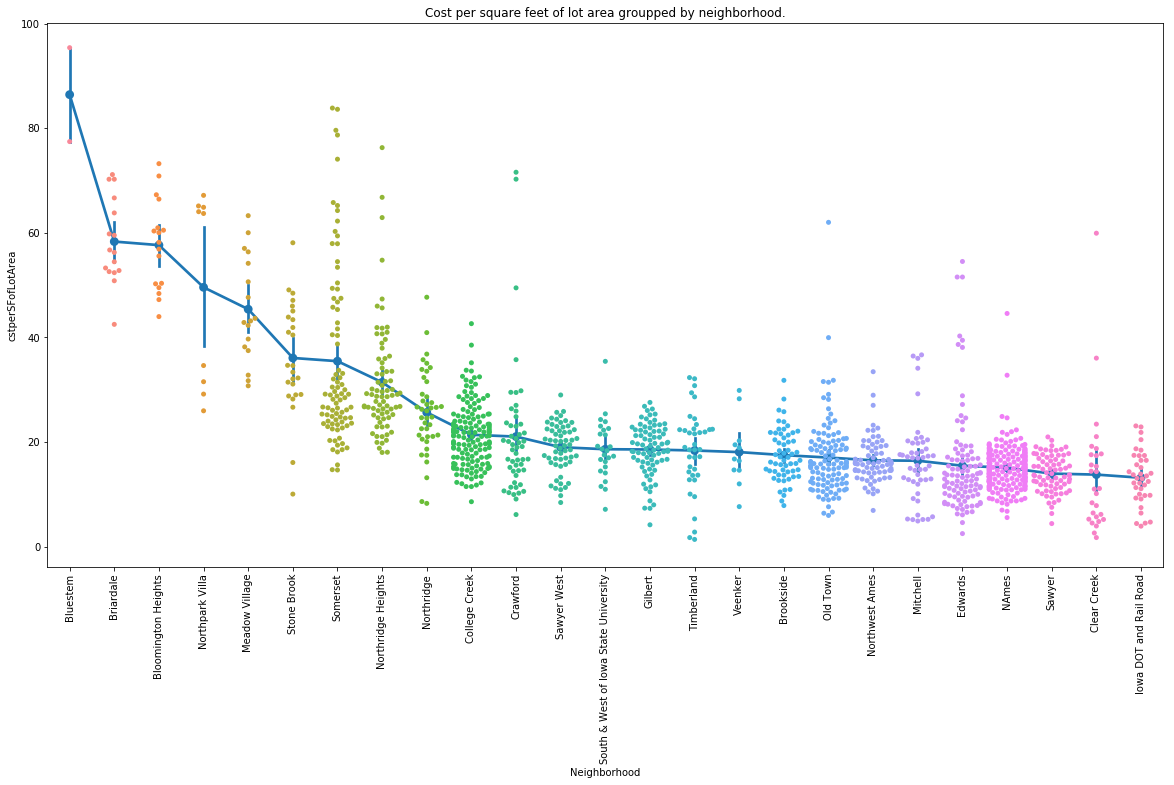

In [172]:
fig, ax = plt.subplots(figsize=[20,10])
sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea)
sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea)
plt.xticks(rotation=90)
plt.title('Cost per square feet of lot area groupped by neighborhood.')

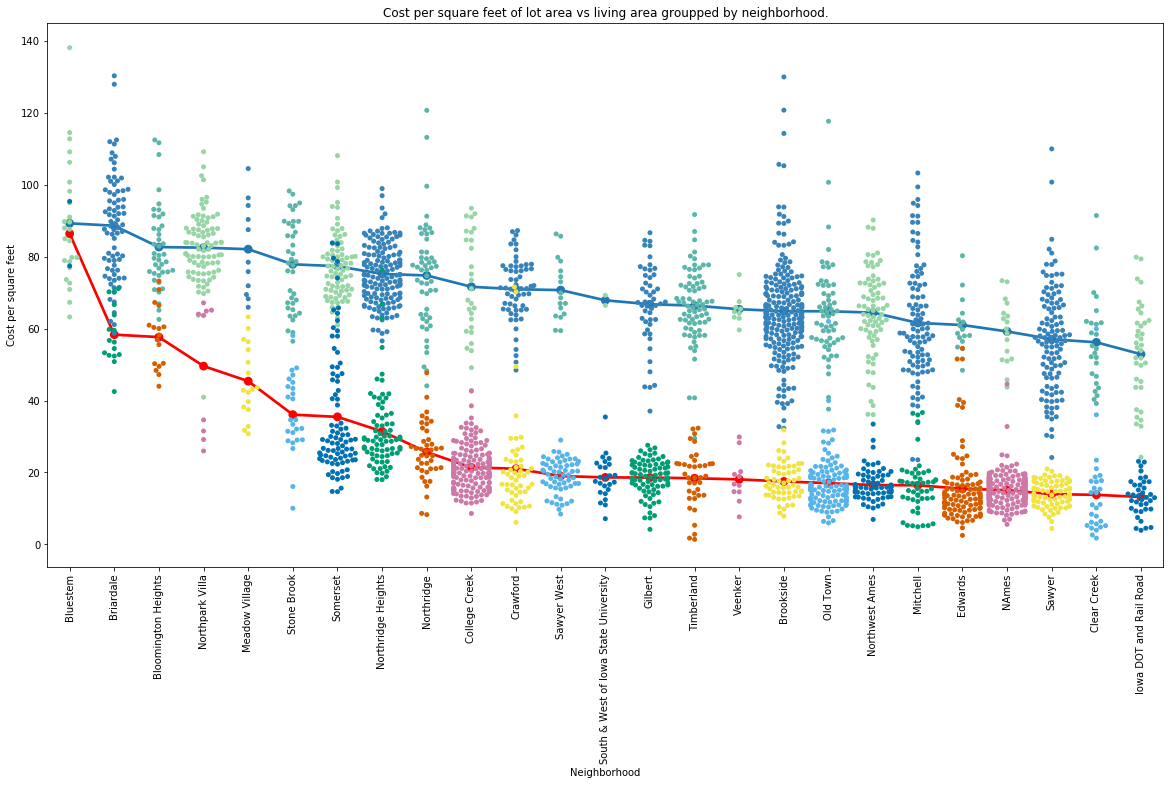

In [173]:
palette= [ '#96D5A4', '#3682BA', '#5BB6A9']

fig, ax = plt.subplots(figsize=[20,10])
_ = sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace,
              palette=sns.color_palette(palette))
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace, errwidth=0)

_ = sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea,
              palette=sns.color_palette("colorblind"))
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea, color='r', errwidth=0)

_ = plt.xticks(rotation=90)
_ = plt.ylabel('Cost per square feet')
_ = plt.title('Cost per square feet of lot area vs living area groupped by neighborhood.')

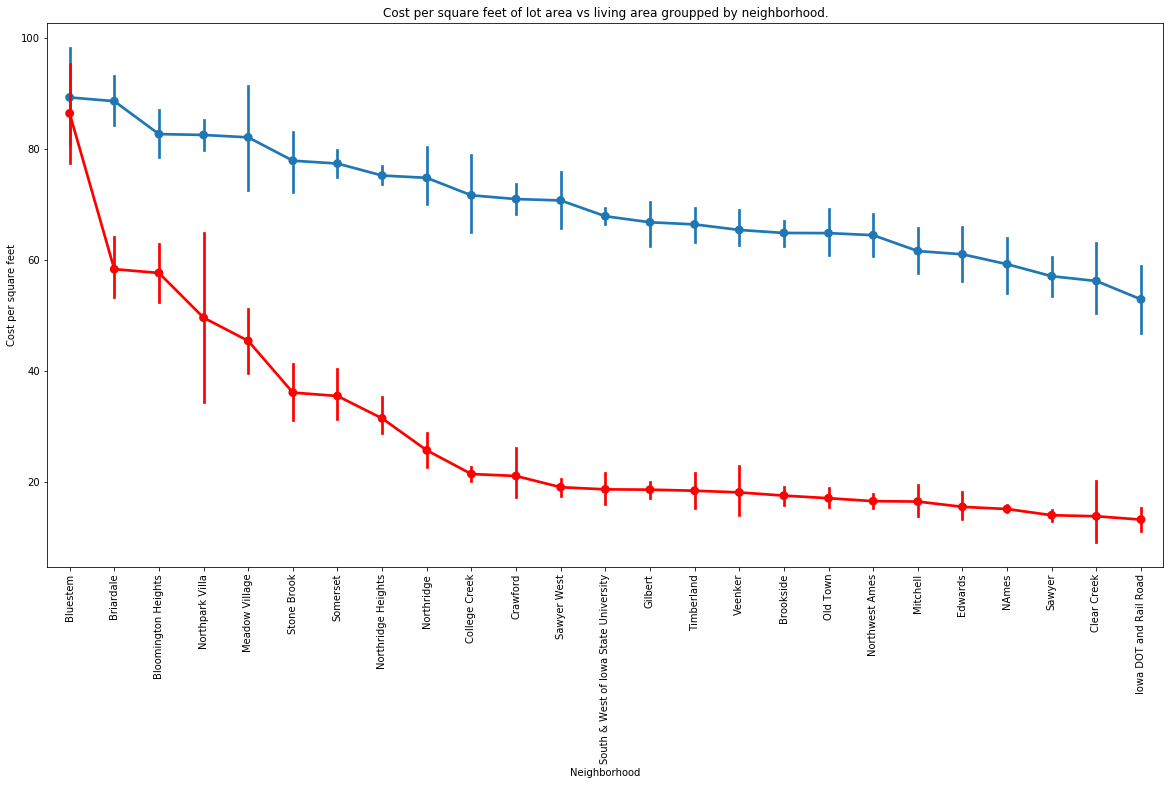

In [238]:
fig, ax = plt.subplots(figsize=[20,10])
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace, ci=99)

_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea, color='r', ci=99)

_ = plt.xticks(rotation=90)
_ = plt.ylabel('Cost per square feet')
_ = plt.title('Cost per square feet of lot area vs living area groupped by neighborhood.')


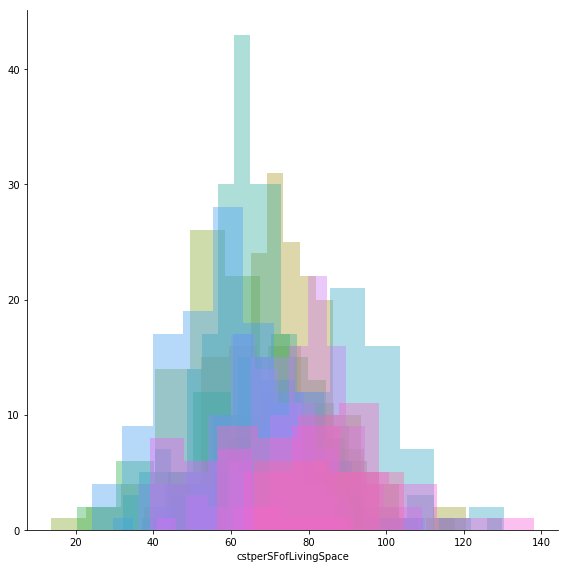

In [174]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'cstperSFofLivingSpace', kde=False)

In [175]:
import plotly.plotly as py
import plotly.graph_objs as go

df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

vc = df.Neighborhood.value_counts()
cols = vc[vc >= vc.median()].index

data = []
for n in cols:
    trace = go.Histogram(x=df[df.Neighborhood == n].SalePrice, name=n)
    data.append(trace)

layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked histogram')

In [176]:
import plotly.plotly as py
import plotly.graph_objs as go

df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

vc = df.Neighborhood.value_counts()
cols = vc[vc <= vc.median()].index

data = []
for n in cols:
    trace = go.Histogram(x=df[df.Neighborhood == n].SalePrice, name=n)
    data.append(trace)

layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked histogram')

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



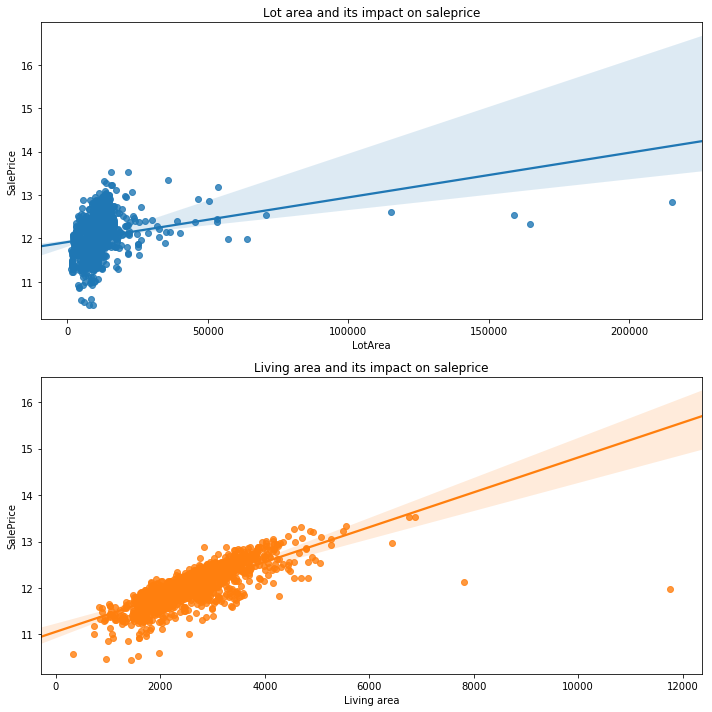

In [179]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10], tight_layout=True)
_ = sns.regplot(df.LotArea, df.SalePrice, ax=ax[0])
_ = ax[0].set_title('Lot area and its impact on saleprice')
_ = sns.regplot((df.TotalBsmtSF + df.GrLivArea), df.SalePrice, ax=ax[1])
_ = ax[1].set_title('Living area and its impact on saleprice')
_ = ax[1].set_xlabel('Living area')